# Extracción de datos de Twitter por medio de API 

API (Application Programming Interfaces), en español, interfaz de programación de aplicaciones, definiciones y protocolos que se utiliza para desarrollar e integrar el software de las aplicaciones, permitiendo la comunicación entre dos aplicaciones de software a través de un conjunto de reglas. Éstas dependen de las aplicaciones que se van a utilizar, y de los permisos que les dé el propietario de la API a los desarrolladores de terceros.

## API de twitter
Específicamente, utilizaremos la API de Twitter para extraer y analizar tweets, y de esta manera obtener información sobre la incidencia de COVID-19 en Venezuela.

**Twarc** Bibilioteca de Python utilizada para acceder a la API de Twitter.

**Pasos a seguir para poder utilizar esta aplicación**
- Tener una cuenta en la red social de Twitter.
- Solicitar una cuenta de desarrollador; al ser aprobada, crear una aplicación para poder extraer los datos de Twitter.
- Extraer las credenciales de permiso (API KEY, API SECRET, ACCESS TOKEN, ACCESS TOKEN SECRET).


Importamos las bibliotecas con las que vamos a trabajar

In [2]:
import twarc 
import datetime
import itertools
from twarc.client2 import Twarc2
import json
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 


Hacemos la autenticación mediante el bearer token

In [291]:
t = Twarc2(bearer_token="AAAAAAAAAAAAAAAAAAAAABmzOgEAAAAAAdXaEdw8lrDMBtPj%2BwY318SBBmk%3DCvdZpj9aQg2ORVIfm0glUMXBNSm1yoDl1Zp1ifSRh3Lf6j6QEm")

La consulta la definimos entre el período comprendido entre el 13 de marzo de 2020 hasta el 8 de mayo de 2021. Para eso definimos las variables 'fecha de inicio', 'fecha final'. 

In [45]:
start_time = datetime.datetime(2020, 3, 13, 0, 0, 0, 0, datetime.timezone.utc)
end_time = datetime.datetime(2021, 5, 8, 0, 0, 0, 0, datetime.timezone.utc)

La consulta está determinada por las siguientes frases o palabras claves: 

**Palabras claves** 
- covid-19
- coronavirus
- infectado covid-19
- muerte covid-19
- bombona de oxígeno
- dexametasona
- GoFundMe venezuela (con link)
- recolectar dinero
- ayuda covid-19
- flujómetro de oxígeno
- Tratamiento covid-19
- UCI covid-19
- #ServicioPúblico covid-19
- #ServicioPublico covid-19


**Filtros**

- No retweets
- País: venezuela


## Búsqueda general


Leer los datos que se encuentran en un archivo .csv, con la columna 'created_at' como fecha; luego, pedir su forma.

In [51]:
df = pd.read_csv('data.csv', parse_dates=['created_at'])
df.shape 

(2560, 4)

Convertir la columna a fecha.

In [52]:
def counts_time_series(df):
    '''Convertir la columna a fecha'''
    df['created_at'] = pd.to_datetime(df['created_at'], format='%Y-%m-%d', errors='coerce')
    
    '''Agrupa por el dia y cuenta el numero de entradas con ese dia y lo convierte a una serie de tiempo'''
    time_series_with_counts = df.groupby(df['created_at'].dt.floor('d')).size()
    
    '''Remover las filas que sean iguales'''
    time_series_with_counts.drop_duplicates(keep='first')

    return time_series_with_counts

In [53]:
twitter_time_series =  counts_time_series(df)

<AxesSubplot:xlabel='created_at'>

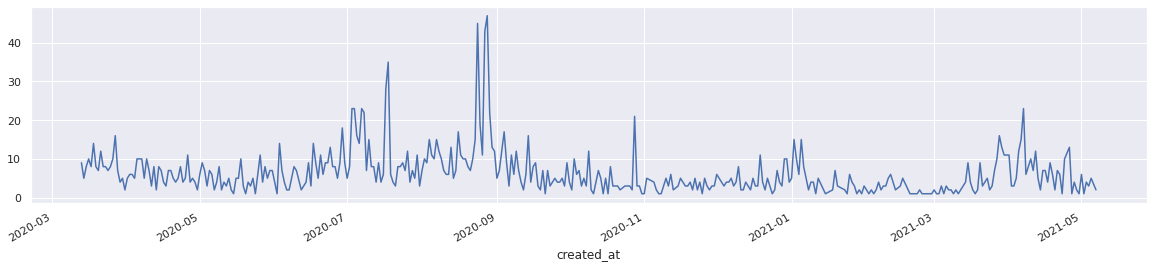

In [54]:
sns.set(rc={'figure.figsize':(20, 4)})
twitter_time_series.plot()

## Búsquedas por separado

**Búsqueda**

- covid-19
- coronavirus

Esta búsqueda no es muy confiable, ya que arroja cualquier tweet relacionado al COVID_19, razón por la cual la hace muy ambigua. 

In [ ]:
search_results = t.search_all(query="covid-19 place_country:VE -is:retweet OR coronavirus place_country:VE -is:retweet", start_time=start_time, end_time=end_time)

In [273]:
#datos_twitter = pd.read_csv('datos_twitter.csv', parse_dates=['created_at'])
#datos_twitter.shape 

In [274]:
#twitter_time_series =  counts_time_series(datos_twitter)

In [275]:
#twitter_time_series.plot()


**Búsqueda1**

- infectado covid-19
- muerte covid-19

In [270]:
datos_twitter1 = pd.read_csv('datos_twitter1.csv', parse_dates=['created_at']) #leer los datos, con la columna 'created at' como fecha 
datos_twitter1.shape 

(304, 2)

In [271]:
twitter_time_series =  counts_time_series(datos_twitter1)

<AxesSubplot:xlabel='created_at'>

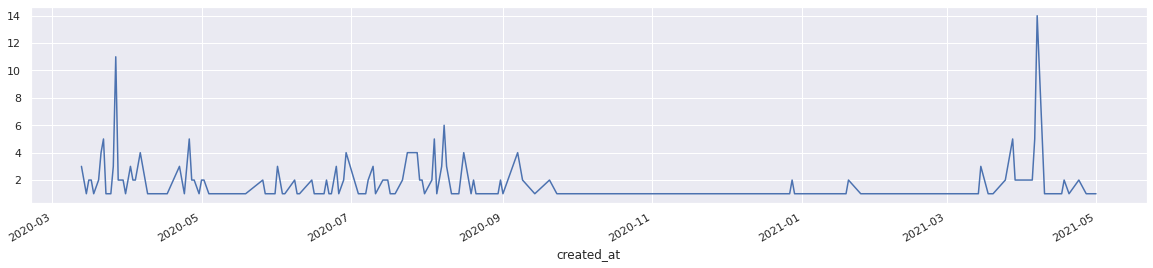

In [272]:
twitter_time_series.plot()

**Búsqueda2**

    - oxígeno
    - dexametasona
    
Al colocar en la búsqueda solo la palabra "oxígeno" causa mucho ruido, esta palabra se sustituye por "bombona de oxígeno" y "flujómetro de oxígeno", con esta última no obtuvimos muchos resultados. 
 

**Búsqueda3**

- bombona de oxígeno
- flujometro de oxígeno
- dexametasona

In [307]:
search_results = t.search_all(query="bombona de oxígeno place_country:VE -is:retweet OR dexametasona place_country:VE -is:retweet OR flujómetro de oxígeno place_country:VE -is:retweet", start_time=start_time, end_time=end_time)
search_results = t.search_all(query="bombona de oxigeno place_country:VE -is:retweet OR flujometro de oxigeno place_country:VE -is:retweet", start_time=start_time, end_time=end_time)

In [308]:
datos_twitter3 = pd.read_csv('datos_twitter3.csv', parse_dates=['created_at']) #leer los datos, con la columna 'created at' como fecha 
datos_twitter3.shape 

(259, 3)

In [309]:
twitter_time_series =  counts_time_series(datos_twitter3)

<AxesSubplot:xlabel='created_at'>

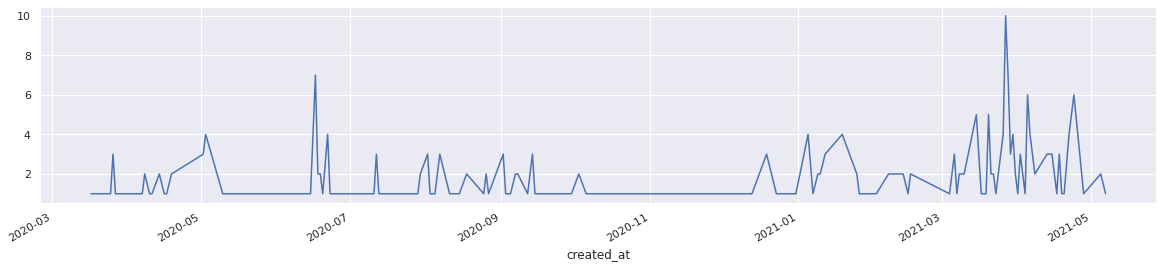

In [310]:
twitter_time_series.plot()

**Búsqueda4**

- campañas GoFundMe tratamiento covid
- recolectar dinero covid
- GoFundMe venezuela (con link)
- ayuda covid-19

In [96]:
search_results = t.search_all(query="GoFundMe venezuela covid -is:retweet OR recolectar dinero covid place_country:VE -is:retweet", start_time=start_time, end_time=end_time)
search_results = t.search_all(query="GoFundMe venezuela has:links -is:retweet OR recolectar dinero place_country:VE has:links -is:retweet", start_time=start_time, end_time=end_time)
search_results = t.search_all(query="ayuda covid-19 place_country:VE -is:retweet", start_time=start_time, end_time=end_time)

In [48]:
datos_twitter4 = pd.read_csv('datos_twitter4.csv', parse_dates=['created_at']) #leer los datos, con la columna 'created at' como fecha 
datos_twitter4.shape

(649, 2)

In [49]:
twitter_time_series =  counts_time_series(datos_twitter4)

<AxesSubplot:xlabel='created_at'>

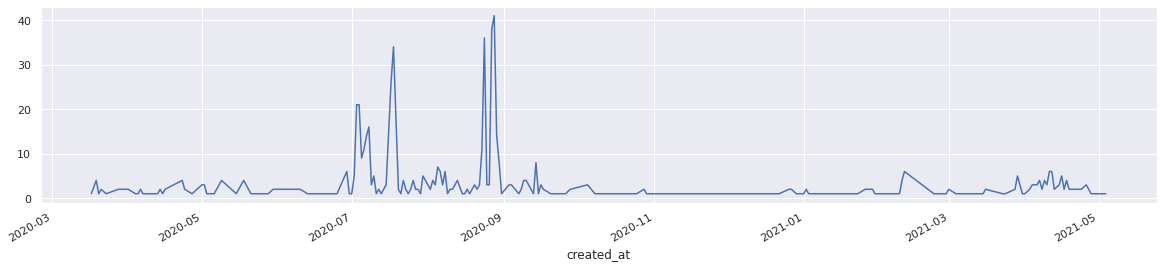

In [50]:
twitter_time_series.plot()

**Búsqueda5**

- Servicio público
- #serviciopublico
- #serviciopublico covid-19

In [147]:
search_results = t.search_all(query="#ServicioPúblico covid-19 place_country:VE -is:retweet", start_time=start_time, end_time=end_time)
search_results = t.search_all(query="#ServicioPublico covid-19 place_country:VE -is:retweet", start_time=start_time, end_time=end_time)

In [316]:
datos_twitter10 = pd.read_csv('datos_twitter10.csv', parse_dates=['created_at']) 
datos_twitter10.shape 

(906, 2)

In [317]:
twitter_time_series =  counts_time_series(datos_twitter10)

<AxesSubplot:xlabel='created_at'>

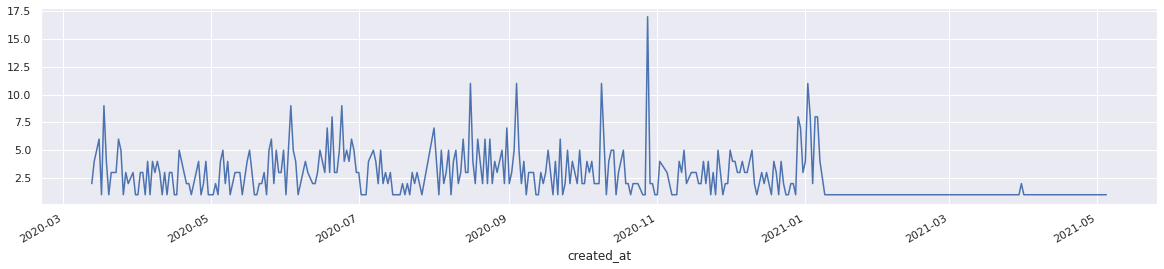

In [318]:
twitter_time_series.plot()

**Búsqueda6**

- UCIS 
- unidad de cuidados intensivos

In [162]:
search_results = t.search_all(query="UCIS place_country:VE -is:retweet OR unidad de cuidados intensivos place_country:VE -is:retweet", start_time=start_time, end_time=end_time)

In [319]:
datos_twitter8 = pd.read_csv('datos_twitter8.csv', parse_dates=['created_at'])  
datos_twitter8.shape 

(76, 2)

In [320]:
twitter_time_series =  counts_time_series(datos_twitter8)

<AxesSubplot:xlabel='created_at'>

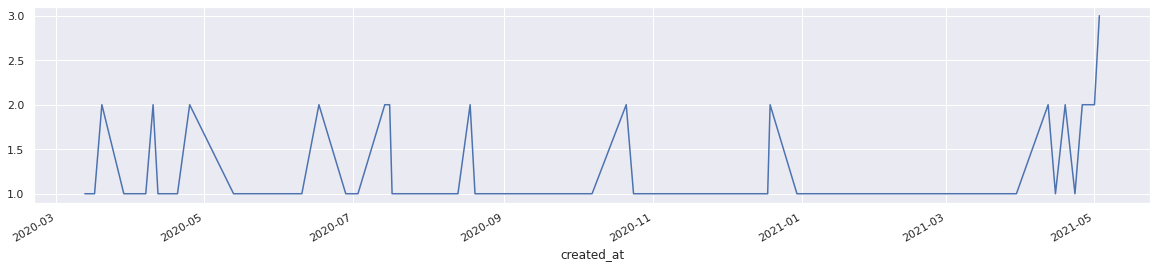

In [321]:
twitter_time_series.plot()

**Búsqueda7**

- tratamiento covid-19 

In [44]:
search_results = t.search_all(query="tratamiento covid-19 place_country:VE -is:retweet", start_time=start_time, end_time=end_time)

In [45]:
datos_twitter9 = pd.read_csv('datos_twitter9.csv', parse_dates=['created_at']) 
datos_twitter9.shape

(324, 2)

In [46]:
twitter_time_series =  counts_time_series(datos_twitter9)

<AxesSubplot:xlabel='created_at'>

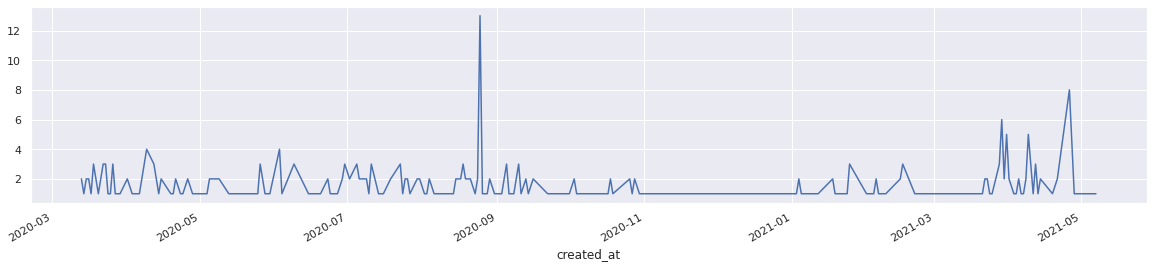

In [47]:
twitter_time_series.plot()